In [1]:
import pandas as pd

In [2]:
profile = pd.read_excel('datasets/alunos/profiles.xlsx')

In [3]:
col_names = {
    'NOME:': 'Participant', 
    'IDADE': 'idade',
    'REGIAO RESIDÊNCIA': 'regiao_uf', 
    'FORMAÇÃO ACADÊMICA:': 'area_formacao',
    'JÁ UTILIZOU GIT?': 'git',
    'JÁ UTILIZOU PANDAS?': 'pandas', 
    'JÁ UTILIZOU NUMPY?': 'numpy',
}

In [4]:
#forma 1

profile.rename(columns=col_names).head(2)

,Participant,idade,regiao_uf,area_formacao,git,pandas,numpy
0,939065eece719c2e24382f347e0395ab9aa3f4933249c3...,<30,Sul/Sudeste,NaN,NÃO,NÃO,NÃO
1,f5e39c38b5d7ae57a67a4e533d1c3fbadcbddae039868a...,<30,Sul/Sudeste,Ciências Exatas,SIM,NÃO,NÃO


In [5]:
#forma 2

profile.columns = ['Participant', 'idade', 'regiao_uf', 'area_formacao', 'git', 'pandas', 'numpy']
profile.head(2)

,Participant,idade,regiao_uf,area_formacao,git,pandas,numpy
0,939065eece719c2e24382f347e0395ab9aa3f4933249c3...,<30,Sul/Sudeste,NaN,NÃO,NÃO,NÃO
1,f5e39c38b5d7ae57a67a4e533d1c3fbadcbddae039868a...,<30,Sul/Sudeste,Ciências Exatas,SIM,NÃO,NÃO


In [6]:
profile.head()

,Participant,idade,regiao_uf,area_formacao,git,pandas,numpy
0,939065eece719c2e24382f347e0395ab9aa3f4933249c3...,<30,Sul/Sudeste,NaN,NÃO,NÃO,NÃO
1,f5e39c38b5d7ae57a67a4e533d1c3fbadcbddae039868a...,<30,Sul/Sudeste,Ciências Exatas,SIM,NÃO,NÃO
2,365bea1e0e58d1dd2124f6156f41cf26bde7babc74cbea...,<30,Nordeste,Ciências Exatas,NÃO,SIM,SIM
3,d59df35ac8cca9741c7d14751827a93372178571f12e72...,>=30 e <=40,Sul/Sudeste,Ciências Exatas,SIM,NÃO,NÃO
4,9e5ef9fc98988ed88abae4dcc91ea7b05672e5ea261b5b...,<30,Sul/Sudeste,Ciências Exatas,NÃO,SIM,SIM


In [7]:
import os

def carrega_pasta_csv(path:str) -> pd.DataFrame:
    """
    Carrega todos os arquivos CSV de uma pasta e retorna um DataFrame consolidado.
    Parâmetros:
    path (str): O caminho da pasta contendo os arquivos CSV.
    Retorna:
    pd.DataFrame: Um DataFrame consolidado contendo os dados de todos os arquivos CSV da pasta.
    Exemplo:
    >>> carrega_pasta_csv('/caminho/para/pasta')
    Retorna um DataFrame consolidado com os dados dos arquivos CSV da pasta especificada.
    """

    dados_aulas = []

    for file in os.listdir(path):
        if file.endswith('.csv'):
            df = pd.read_csv(os.path.join(path, file))
            df['data'] = file.split('_')[-1].split('.')[0]
            dados_aulas.append(df)

    dados_aulas = pd.concat(dados_aulas)
    return dados_aulas.reset_index(drop=True)

'03:10:20' => 3h10min20s ==> xxxmin

In [8]:
from datetime import datetime

str = '03:10:20'


In [9]:
%%timeit
time_obj = datetime.strptime(str, '%H:%M:%S')
time_obj.hour * 60 + time_obj.minute +time_obj.second/60


13.5 μs ± 1.18 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
%%timeit
sum([int(x[0])*x[1] for x in zip(str.split(':'), [60, 1, 1/60])])


2.01 μs ± 235 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [11]:
def convert_hora2minutos(hora:str) -> float:
    return round(sum([int(x[0])*x[1] for x in zip(hora.split(':'), [60, 1, 1/60])]), 3)


In [12]:
dados_aulas = carrega_pasta_csv(path = os.path.join('datasets', 'alunos'))

In [13]:
dados_aulas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Participant      105 non-null    object
 1   Attendance time  105 non-null    object
 2   Camera time      105 non-null    object
 3   Mic time         105 non-null    object
 4   Time speaking    105 non-null    object
 5   Time presenting  105 non-null    object
 6   Hands raised     105 non-null    int64 
 7   Emojis sent      105 non-null    int64 
 8   Messages sent    105 non-null    int64 
 9   data             105 non-null    object
dtypes: int64(3), object(7)
memory usage: 8.3+ KB


In [14]:
dados_aulas.sample(5)

,Participant,Attendance time,Camera time,Mic time,Time speaking,Time presenting,Hands raised,Emojis sent,Messages sent,data
19,365bea1e0e58d1dd2124f6156f41cf26bde7babc74cbea...,02:59:44,01:21:23,00:00:00,00:00:00,00:00:00,0,6,0,2024-08-26
44,6d26619b6b29eaeba89901c3aac888cec5093965f5fcaf...,02:58:03,01:58:54,00:06:55,00:03:57,00:00:00,0,177,20,2024-08-28
21,86542b003e830186a9f5a8ce2f147bfecf7ba00c73e897...,02:59:53,01:07:14,00:00:02,00:00:01,00:00:00,0,0,0,2024-08-26
94,2b2a60f6e5485123c6c8aa012d76f76187489ddd5d003a...,03:09:11,02:40:16,00:31:21,00:21:25,00:00:00,10,71,30,2024-08-23
45,04b90521e23b6a5589c7f55c86a71a3fe223dd4631ea51...,03:09:45,02:34:07,02:53:32,02:13:51,02:10:18,0,0,0,2024-08-28


In [15]:
colunas_processar = ['Attendance time', 'Camera time', 
                     'Mic time', 'Time speaking',
                     'Time presenting']

In [16]:
for coluna in colunas_processar:
    dados_aulas[coluna] = dados_aulas[coluna].apply(convert_hora2minutos)

In [17]:
dados_aulas

,Participant,Attendance time,Camera time,Mic time,Time speaking,Time presenting,Hands raised,Emojis sent,Messages sent,data
0,ca37c192f9f7539369cd549189760345543f168d828f33...,181.183,79.617,0.117,0.000,0.000,0,81,1,2024-08-26
1,2b2a60f6e5485123c6c8aa012d76f76187489ddd5d003a...,17.067,19.500,10.900,2.083,0.000,0,7,2,2024-08-26
2,ad6acd323806e30ca6a37ad2cb78f28493addc17339ef2...,166.150,48.850,1.667,0.633,0.000,0,64,4,2024-08-26
3,4b11afc7fc6458effe203e924722e2863e66f4fe0b1ba2...,182.017,145.767,3.717,0.167,0.000,1,5,4,2024-08-26
4,daed0aa5ffdee628ae24991b2c984f66ac26a172f830bb...,186.217,180.233,47.183,37.317,0.000,1,40,6,2024-08-26
...,...,...,...,...,...,...,...,...,...,...
100,a73035ba29e279c7dd54a959055e0ddafacb294addf8df...,179.117,114.167,0.200,0.167,0.000,0,6,0,2024-08-23
101,2d737c12904c8a1890cfb106c74c02684317184d8dff3f...,179.400,134.200,13.233,2.183,0.000,0,6,5,2024-08-23
102,92a66ccdd2dc048646b940702877736fa5941c6eafee71...,174.833,123.433,0.517,0.417,0.000,0,19,3,2024-08-23
103,6d26619b6b29eaeba89901c3aac888cec5093965f5fcaf...,171.933,108.700,0.433,0.300,0.000,0,147,14,2024-08-23


In [18]:
dados_aulas['data'] = pd.to_datetime(dados_aulas['data'], format='%Y-%m-%d')

In [19]:
dados_aulas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Participant      105 non-null    object        
 1   Attendance time  105 non-null    float64       
 2   Camera time      105 non-null    float64       
 3   Mic time         105 non-null    float64       
 4   Time speaking    105 non-null    float64       
 5   Time presenting  105 non-null    float64       
 6   Hands raised     105 non-null    int64         
 7   Emojis sent      105 non-null    int64         
 8   Messages sent    105 non-null    int64         
 9   data             105 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 8.3+ KB


In [20]:
dados_aulas.describe()

,Attendance time,Camera time,Mic time,Time speaking,Time presenting,Hands raised,Emojis sent,Messages sent,data
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105
mean,135.946648,121.950952,16.952562,8.656181,5.868257,1.352381,40.923810,9.438095,2024-08-24 15:05:08.571428608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-08-21 00:00:00
25%,21.267000,95.450000,0.117000,0.000000,0.000000,0.000000,5.000000,1.000000,2024-08-23 00:00:00
50%,178.950000,134.850000,2.467000,1.100000,0.000000,0.000000,30.000000,4.000000,2024-08-26 00:00:00
75%,184.400000,162.517000,16.883000,4.817000,0.000000,2.000000,58.000000,9.000000,2024-08-28 00:00:00
max,211.983000,185.717000,195.717000,154.450000,153.433000,10.000000,294.000000,86.000000,2024-08-28 00:00:00
std,75.537072,51.424098,40.351678,27.311096,26.452444,2.192562,49.071709,15.063918,NaN


In [21]:
limite_50 = 134.85
limite_70 = 162.517

In [22]:
df2 = dados_aulas[dados_aulas['Camera time'] < limite_50].reset_index(drop=True)

In [23]:
df2.Participant.value_counts()

Participant
2b2a60f6e5485123c6c8aa012d76f76187489ddd5d003a82d627986f4c928125    6
86542b003e830186a9f5a8ce2f147bfecf7ba00c73e89747924abb431c4807ef    4
8e59bee15978f8c0a1d9a9d82802b2be19083c373454fd44681f83c5524c2b35    3
47a7c412c0ede005f50d7fcf7c9207e69e53f2045d81c793edad4b893693202a    3
ad6acd323806e30ca6a37ad2cb78f28493addc17339ef246b2934e18a7765b07    3
2d737c12904c8a1890cfb106c74c02684317184d8dff3fbe83324bc1d21d438d    3
edab98fbc0a76faf6231492eccd3cac4779cdce812248f4147136a9d51c281b6    3
dba68f39815752c5ce8ed9ed8740d520ad5b1fd9640f8d95c377170d0fef76e8    3
6d26619b6b29eaeba89901c3aac888cec5093965f5fcaf3420d9f0038024c29f    3
5c42c56b65dbc3ef6676cd3cb68accb47c45ee9b25ce5480bd255422d673da0f    3
ca37c192f9f7539369cd549189760345543f168d828f33f85f4799745a41e45a    2
92a66ccdd2dc048646b940702877736fa5941c6eafee717b3ff480cabb9ab3f4    2
365bea1e0e58d1dd2124f6156f41cf26bde7babc74cbeaf8936f7fecc65ae654    2
3c24c973491a4900c95f36a53c7e70a52c48a08e706edab9eaa8ab7911af7b39    2
f5e39c38

In [24]:
dados_aulas[(dados_aulas['Camera time'] >= limite_50) & 
            (dados_aulas['Camera time'] < limite_70)].Participant.value_counts()

Participant
4b11afc7fc6458effe203e924722e2863e66f4fe0b1ba20b41d68e3328415800    4
cbb84bc2fe8d064e85a7b92507d3e1087847c3320c007173f98e6a3fed9bc570    3
d59df35ac8cca9741c7d14751827a93372178571f12e725a4d11d3452463a502    2
9e5ef9fc98988ed88abae4dcc91ea7b05672e5ea261b5ba9f25fce1a110dfcd1    2
04b90521e23b6a5589c7f55c86a71a3fe223dd4631ea51fac7d42ec3ffb561f6    2
6b1335aa7b237370369cd619a67b4695844f97bc1f42bec8b7771615fe6d4d74    1
daed0aa5ffdee628ae24991b2c984f66ac26a172f830bb0b12ed5d9dacb0d2a2    1
3c24c973491a4900c95f36a53c7e70a52c48a08e706edab9eaa8ab7911af7b39    1
a73035ba29e279c7dd54a959055e0ddafacb294addf8dfe8fdf5ac0118550f6d    1
92a66ccdd2dc048646b940702877736fa5941c6eafee717b3ff480cabb9ab3f4    1
dba68f39815752c5ce8ed9ed8740d520ad5b1fd9640f8d95c377170d0fef76e8    1
71ebcb21b682814489a1c1ca431691e9c0c38a28ebeecec2eec5e6e3d75b554b    1
6d26619b6b29eaeba89901c3aac888cec5093965f5fcaf3420d9f0038024c29f    1
47a7c412c0ede005f50d7fcf7c9207e69e53f2045d81c793edad4b893693202a    1
ad6acd32

In [25]:
dados_aulas.query(f'`Camera time` >= {limite_70}').Participant.value_counts()

Participant
939065eece719c2e24382f347e0395ab9aa3f4933249c3b2ad1a1fa7027a91be    3
ba3138325b35c4d45f2a9ece725128f7b9f88df5c4828e0635447b84c5d51e7b    3
daed0aa5ffdee628ae24991b2c984f66ac26a172f830bb0b12ed5d9dacb0d2a2    2
04b90521e23b6a5589c7f55c86a71a3fe223dd4631ea51fac7d42ec3ffb561f6    2
71ebcb21b682814489a1c1ca431691e9c0c38a28ebeecec2eec5e6e3d75b554b    2
d59df35ac8cca9741c7d14751827a93372178571f12e725a4d11d3452463a502    2
365bea1e0e58d1dd2124f6156f41cf26bde7babc74cbeaf8936f7fecc65ae654    2
5c42c56b65dbc3ef6676cd3cb68accb47c45ee9b25ce5480bd255422d673da0f    1
edab98fbc0a76faf6231492eccd3cac4779cdce812248f4147136a9d51c281b6    1
cbb84bc2fe8d064e85a7b92507d3e1087847c3320c007173f98e6a3fed9bc570    1
a73035ba29e279c7dd54a959055e0ddafacb294addf8dfe8fdf5ac0118550f6d    1
f5e39c38b5d7ae57a67a4e533d1c3fbadcbddae039868a0c222dd0be50cf8560    1
92a66ccdd2dc048646b940702877736fa5941c6eafee717b3ff480cabb9ab3f4    1
6b1335aa7b237370369cd619a67b4695844f97bc1f42bec8b7771615fe6d4d74    1
2d737c12

In [26]:
colunas = dados_aulas.columns

In [27]:
dados_agregados = dados_aulas[colunas[:-1]]\
    .groupby('Participant')\
    .agg({c: ['mean', 'std','median'] for c in colunas[1:-1]})

'''dados_agregados = dados_aulas\
    .groupby('Participant')\
    .agg({
            'data': ['count'],
            **{c: ['mean', 'std','median'] for c in colunas[1:-1]}
        })'''

"dados_agregados = dados_aulas    .groupby('Participant')    .agg({\n            'data': ['count'],\n            **{c: ['mean', 'std','median'] for c in colunas[1:-1]}\n        })"

In [28]:
dados_aulas[['Participant', 'data']].shape, \
dados_aulas[['Participant', 'data']].drop_duplicates().shape

((105, 2), (101, 2))

In [29]:
dados_agg_aulas = dados_aulas[['Participant', 'data']].drop_duplicates()\
    .groupby(['Participant']).count()

dados_agg_aulas.head(2)

,data
Participant,
04b90521e23b6a5589c7f55c86a71a3fe223dd4631ea51fac7d42ec3ffb561f6,4
2b2a60f6e5485123c6c8aa012d76f76187489ddd5d003a82d627986f4c928125,4


In [30]:
dados_presencao_dia = dados_aulas[['Participant', 'data', 'Camera time']]\
    .drop_duplicates(subset=['Participant', 'data'])\
    .pivot_table(index='Participant',
                 columns='data',
                 values='Camera time',
                 aggfunc='count',
                 fill_value=0).reset_index()#.drop(columns=['data'])

dados_presencao_dia.columns = ['Participant'] + [c.strftime('%Y%m%d') for c in dados_presencao_dia.columns[1:]]



dados_presencao_dia.columns

Index(['Participant', '20240821', '20240823', '20240826', '20240828'], dtype='object')

### Merge (join)

Outra tarefa muito comum quando estamos trabalhando com bases de dados é o **cruzamento**

Para fazer isso, utilizamos o método **.merge()**, cujos modos de cruzamento são:

<img src="https://community.qlik.com/legacyfs/online/87693_all-joins.png" width=450>

In [31]:
profile.columns

Index(['Participant', 'idade', 'regiao_uf', 'area_formacao', 'git', 'pandas',
       'numpy'],
      dtype='object')

In [32]:
dados_agregados.reset_index(inplace=True)

In [33]:
dados_agregados.columns = [' '.join(col).strip() for col in dados_agregados.columns.values]

In [34]:
dados_agregados.columns

Index(['Participant', 'Attendance time mean', 'Attendance time std',
       'Attendance time median', 'Camera time mean', 'Camera time std',
       'Camera time median', 'Mic time mean', 'Mic time std',
       'Mic time median', 'Time speaking mean', 'Time speaking std',
       'Time speaking median', 'Time presenting mean', 'Time presenting std',
       'Time presenting median', 'Hands raised mean', 'Hands raised std',
       'Hands raised median', 'Emojis sent mean', 'Emojis sent std',
       'Emojis sent median', 'Messages sent mean', 'Messages sent std',
       'Messages sent median'],
      dtype='object')

In [35]:
profile.shape, dados_agregados.shape

((21, 7), (26, 25))

In [36]:
df_frequencia = pd.merge(left = dados_agg_aulas,
         right = dados_presencao_dia,
         on='Participant',
         how='inner').rename(columns={'data': 'qtd_aulas'})

In [37]:
dados_agregados.head(2)

,Participant,Attendance time mean,Attendance time std,Attendance time median,Camera time mean,Camera time std,Camera time median,Mic time mean,Mic time std,Mic time median,...,Time presenting median,Hands raised mean,Hands raised std,Hands raised median,Emojis sent mean,Emojis sent std,Emojis sent median,Messages sent mean,Messages sent std,Messages sent median
0,04b90521e23b6a5589c7f55c86a71a3fe223dd4631ea51...,152.2125,88.052602,187.8000,162.800250,9.003954,162.9585,181.116750,10.494976,177.6665,...,139.0665,0.000,0.00000,0.0,1.000,0.816497,1.0,2.0,2.309401,2.0
1,2b2a60f6e5485123c6c8aa012d76f76187489ddd5d003a...,135.4040,73.240704,161.6165,77.714625,75.558808,71.4250,11.835375,10.371029,12.7585,...,0.0000,3.375,3.73927,2.5,50.625,50.821642,42.0,17.5,17.138095,15.0


In [38]:
dados = pd.merge(left=profile,
                right=dados_agregados, 
                on='Participant',
                how='outer'
                )

dados = pd.merge(left = dados,
            right = df_frequencia,
            on='Participant',
            how='left')

dados.head(2)

,Participant,idade,regiao_uf,area_formacao,git,pandas,numpy,Attendance time mean,Attendance time std,Attendance time median,...,Emojis sent std,Emojis sent median,Messages sent mean,Messages sent std,Messages sent median,qtd_aulas,20240821,20240823,20240826,20240828
0,04b90521e23b6a5589c7f55c86a71a3fe223dd4631ea51...,NaN,NaN,NaN,NaN,NaN,NaN,152.2125,88.052602,187.8000,...,0.816497,1.0,2.0,2.309401,2.0,4.0,1.0,1.0,1.0,1.0
1,2b2a60f6e5485123c6c8aa012d76f76187489ddd5d003a...,NaN,NaN,NaN,NaN,NaN,NaN,135.4040,73.240704,161.6165,...,50.821642,42.0,17.5,17.138095,15.0,4.0,1.0,1.0,1.0,1.0


In [53]:
dados[dados.regiao_uf.isna()]

,Participant,idade,regiao_uf,area_formacao,git,pandas,numpy,Attendance time mean,Attendance time std,Attendance time median,...,Emojis sent std,Emojis sent median,Messages sent mean,Messages sent std,Messages sent median,qtd_aulas,20240821,20240823,20240826,20240828


In [44]:
dados.fillna({'regiao_uf': 'Não informado',
              'area_formacao': 'Não informado',
              'idade': 'Não informado',
              'git': 'NÃO',
              'pandas': 'NÃO',
              'numpy': 'NÃO'}, inplace=True)


In [61]:
dados.loc[:, ['git', 'pandas', 'numpy']] = \
    dados.loc[:, ['git', 'pandas', 'numpy']].replace({'NÃO': False, 'SIM': True})

/tmp/ipykernel_7845/3627557831.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados.loc[:, ['git', 'pandas', 'numpy']].replace({'NÃO': False, 'SIM': True})


https://stackoverflow.com/questions/77900971/pandas-futurewarning-downcasting-object-dtype-arrays-on-fillna-ffill-bfill


https://www.hashtagtreinamentos.com/missingno-no-python

In [64]:
!pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 2.9 MB/s eta 0:00:0000:0100:01


<Axes: >

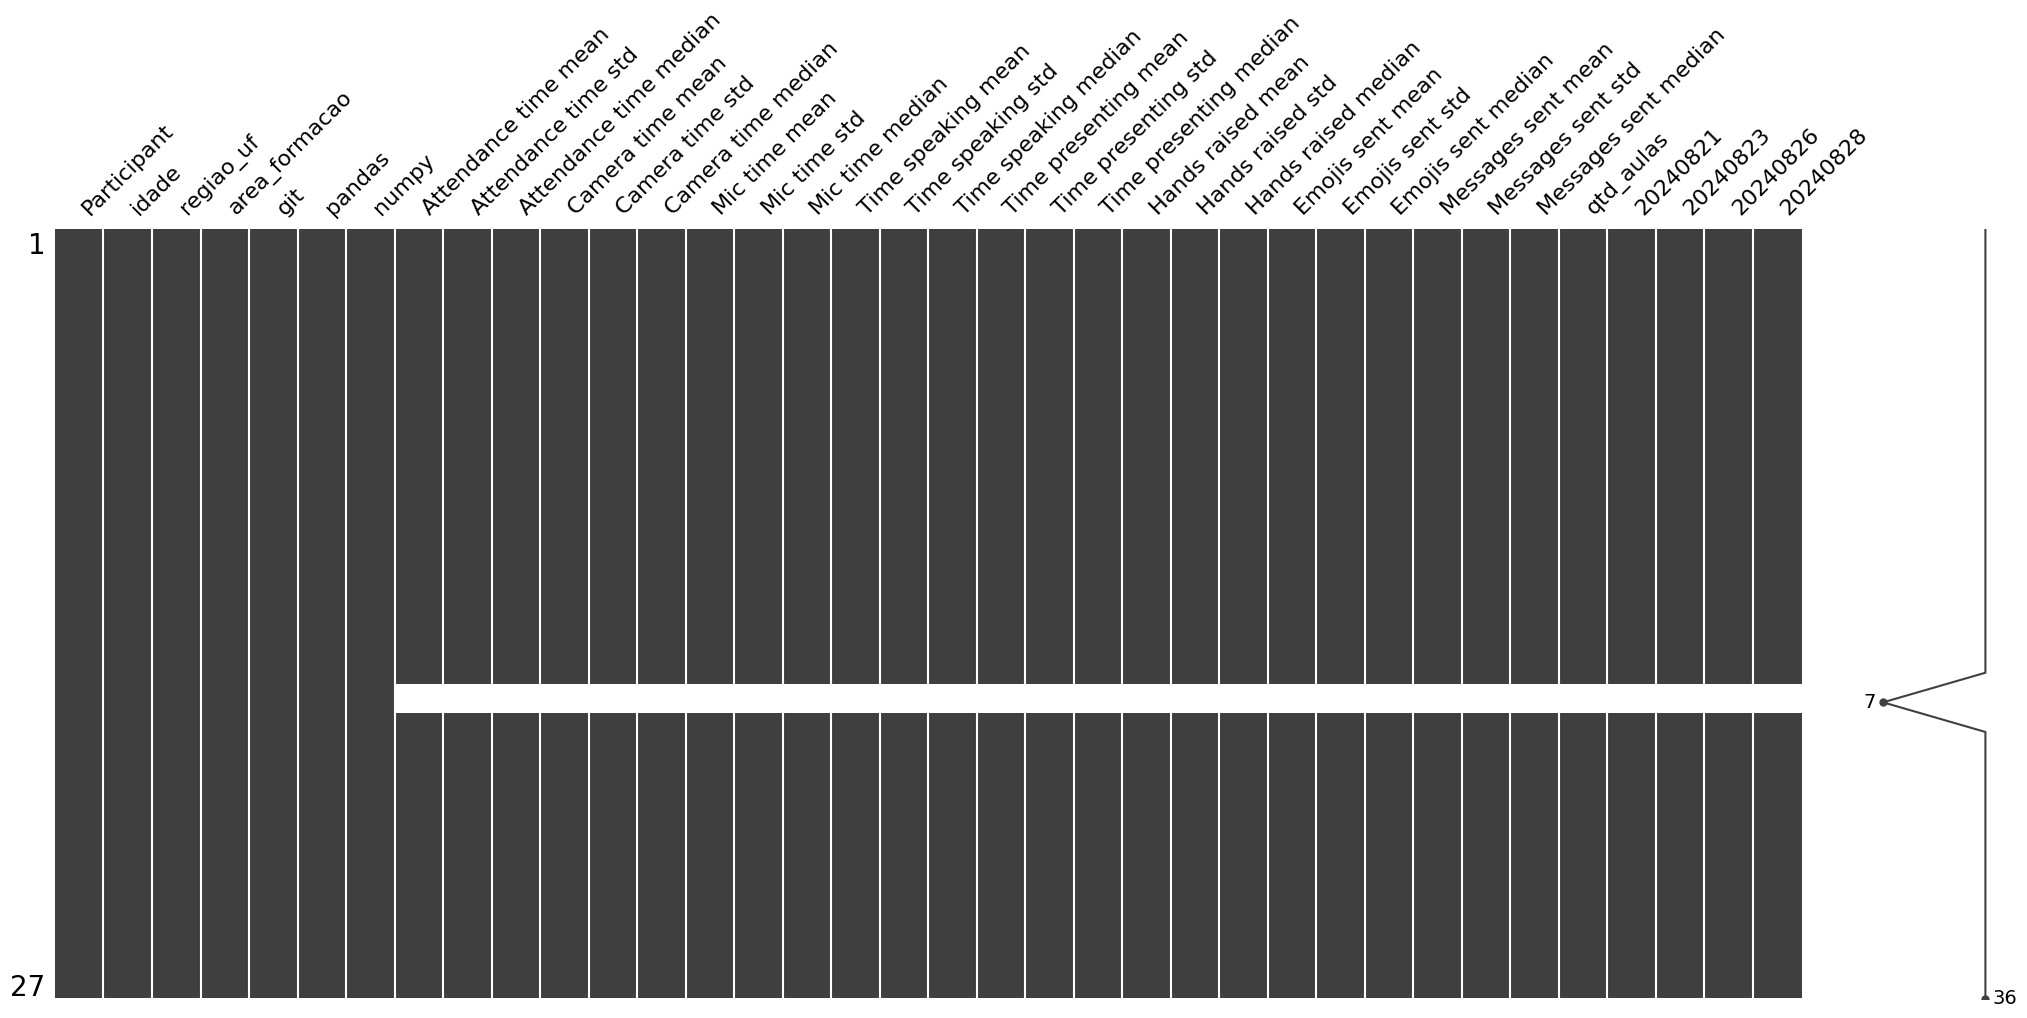

In [68]:
import missingno as msno

msno.matrix(dados)

<Axes: >

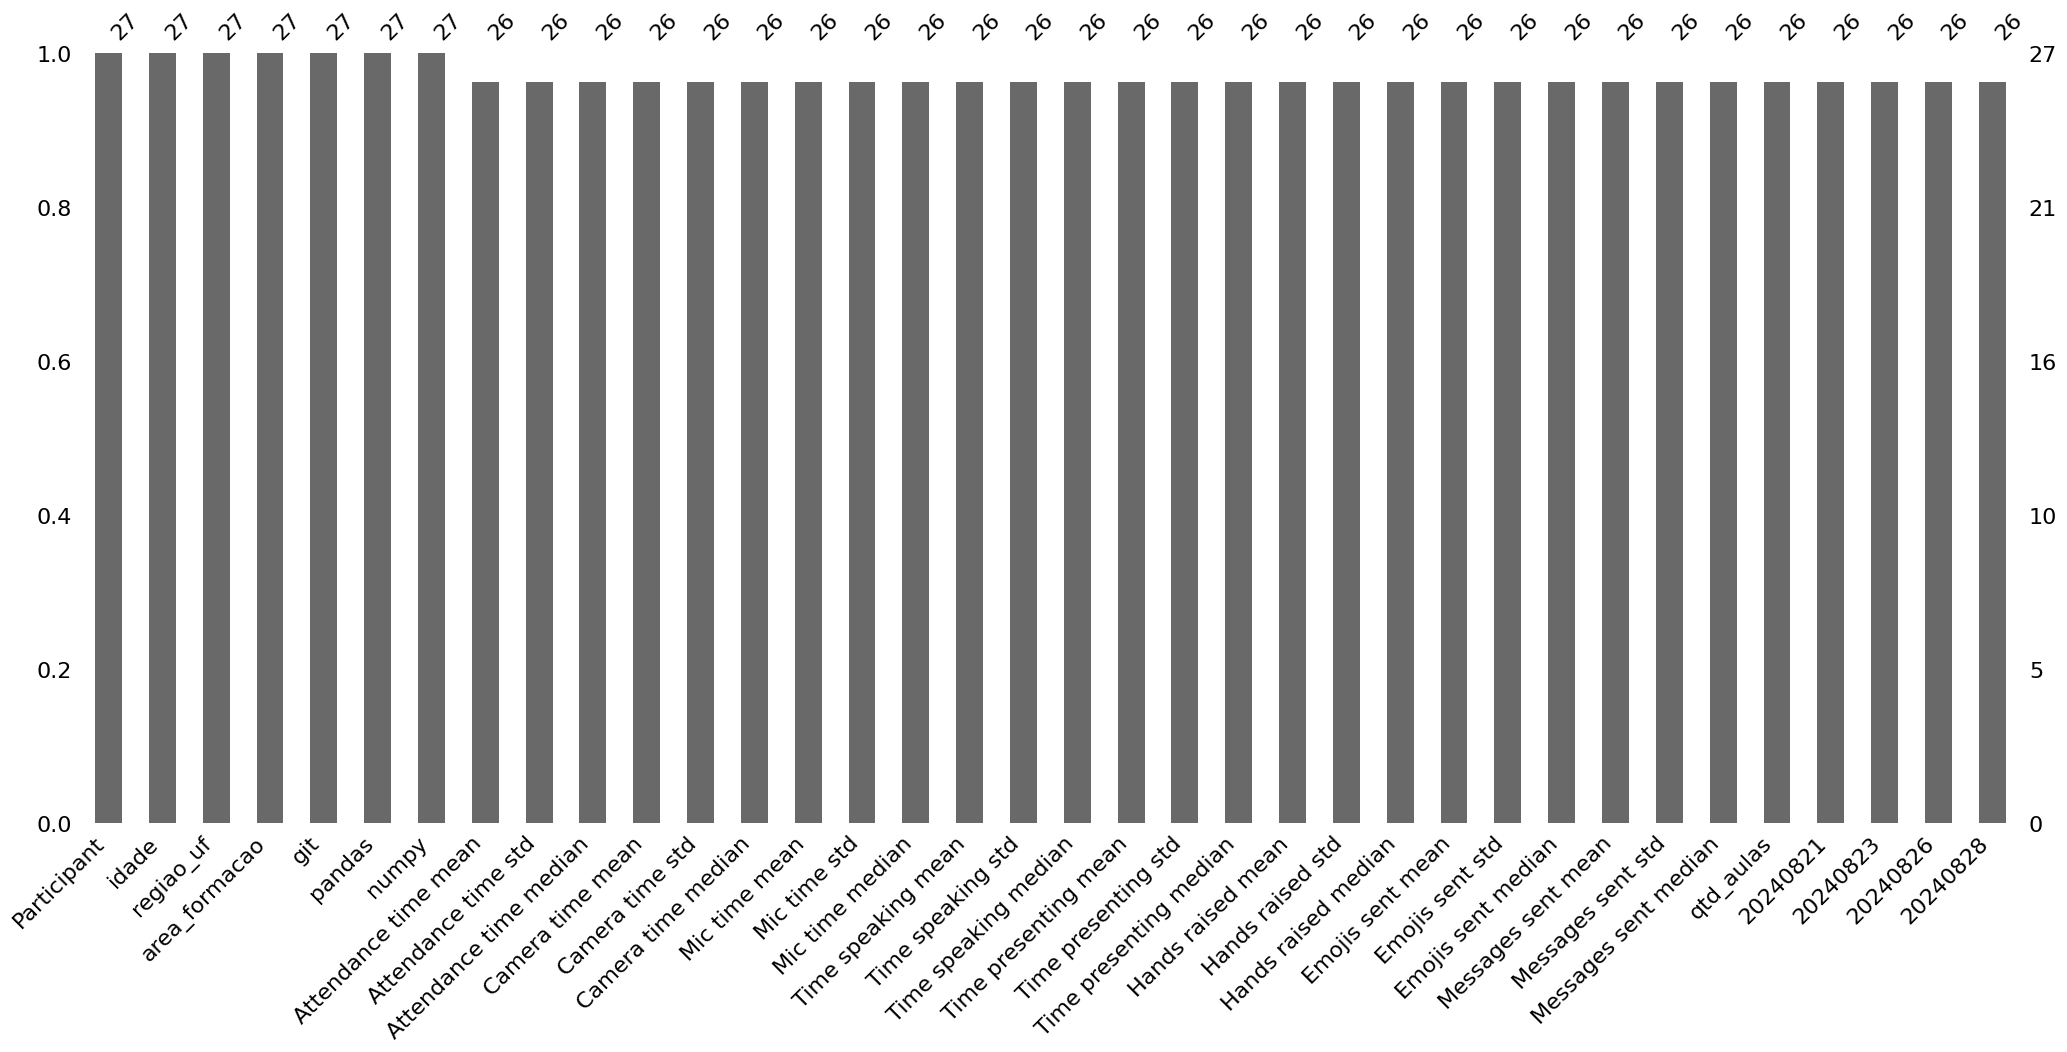

In [69]:
msno.bar(dados)

In [70]:
dados.dropna(inplace=True)

In [71]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 26
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Participant             26 non-null     object 
 1   idade                   26 non-null     object 
 2   regiao_uf               26 non-null     object 
 3   area_formacao           26 non-null     object 
 4   git                     26 non-null     object 
 5   pandas                  26 non-null     object 
 6   numpy                   26 non-null     object 
 7   Attendance time mean    26 non-null     float64
 8   Attendance time std     26 non-null     float64
 9   Attendance time median  26 non-null     float64
 10  Camera time mean        26 non-null     float64
 11  Camera time std         26 non-null     float64
 12  Camera time median      26 non-null     float64
 13  Mic time mean           26 non-null     float64
 14  Mic time std            26 non-null     float64
 

In [73]:
dados.head(6)

,Participant,idade,regiao_uf,area_formacao,git,pandas,numpy,Attendance time mean,Attendance time std,Attendance time median,...,Emojis sent std,Emojis sent median,Messages sent mean,Messages sent std,Messages sent median,qtd_aulas,20240821,20240823,20240826,20240828
0,04b90521e23b6a5589c7f55c86a71a3fe223dd4631ea51...,Não informado,Não informado,Não informado,False,False,False,152.21250,88.052602,187.8000,...,0.816497,1.0,2.00,2.309401,2.0,4.0,1.0,1.0,1.0,1.0
1,2b2a60f6e5485123c6c8aa012d76f76187489ddd5d003a...,Não informado,Não informado,Não informado,False,False,False,135.40400,73.240704,161.6165,...,50.821642,42.0,17.50,17.138095,15.0,4.0,1.0,1.0,1.0,1.0
2,2d737c12904c8a1890cfb106c74c02684317184d8dff3f...,Não informado,Não informado,Não informado,False,False,False,109.27925,80.518833,121.5835,...,2.449490,3.0,2.50,2.081666,2.5,4.0,1.0,1.0,1.0,1.0
3,365bea1e0e58d1dd2124f6156f41cf26bde7babc74cbea...,<30,Nordeste,Ciências Exatas,False,True,True,137.45825,84.177776,177.4330,...,3.000000,8.0,1.00,0.816497,1.0,4.0,1.0,1.0,1.0,1.0
4,3c24c973491a4900c95f36a53c7e70a52c48a08e706eda...,>=30 e <=40,Sul/Sudeste,Ciências Exatas,False,False,False,139.24150,86.733488,179.4165,...,2.061553,1.5,0.75,0.500000,1.0,4.0,1.0,1.0,1.0,1.0
5,47a7c412c0ede005f50d7fcf7c9207e69e53f2045d81c7...,>=30 e <=40,Sul/Sudeste,Ciências Exatas,False,False,False,140.15825,83.232708,180.6415,...,13.500000,30.5,4.25,3.685557,4.0,4.0,1.0,1.0,1.0,1.0


In [75]:
pd.get_dummies(dados['regiao_uf']).astype(int)

,Nordeste,Não informado,Sul/Sudeste
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,0,1
6,0,1,0
7,1,0,0
8,0,0,1
9,0,1,0
